In [2]:
import submitit
import os
import glob
import numpy as np
import pandas as pd
import mne
import submitit
import mne
import numpy as np
from tensorpac import Pac
import matplotlib.pyplot as plt
import os
import urllib
import pandas as pd
import numpy as np
from scipy.io import loadmat

from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude


In [3]:
pid = '7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04'


def ploterpac(pid, n_jobs = 5):
    epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

    # Load metadata

    # Load the epochs
    epochs = mne.read_epochs(epoch_path, preload=True)
    time = epochs.times
    sf = epochs.info['sfreq']
    meta = epochs.metadata.reset_index()
    for i, ch in enumerate(epochs.ch_names):
        
        epoch = epochs.copy().pick_channels([ch])

        
        data = epoch.get_data().squeeze()
        

        # define an ERPAC object
        p = EventRelatedPac(f_pha=[2, 7], f_amp=(25, 80, 5, 2))

        # extract phases and amplitudes
        pha = p.filter(sf, data, ftype='phase', n_jobs=n_jobs)
        amp = p.filter(sf, data, ftype='amplitude', n_jobs=n_jobs)


        # implemented ERPAC methods
        methods = [ 'gc']

        plt.figure(figsize=(14, 8))
        for n_m, m in enumerate(methods):
            # compute the erpac
            erpac = p.fit(pha, amp, method=m, smooth=100, n_jobs=n_jobs).squeeze()

            # plot
            plt.subplot(len(methods), 1, n_m + 1)
            p.pacplot(erpac, time, p.yvec, xlabel='Time (second)' * n_m,
                    cmap='Spectral_r', ylabel='Amplitude frequency', title=f'{ch} - phase freq = [2, 7] Hz',
                    cblabel='ERPAC', vmin=0., rmaxis=True)
            plt.axvline(0, linestyle='--', color='w', linewidth=2)

        plt.tight_layout()
        p.savefig(f'/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/PAC/erpac/erpac_{pid}_{ch}.png')

path = '/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/preprocessing/clean_data.csv'
df = pd.read_csv(path)

pids = df['pid'].values
for i, pid in enumerate (pids):
    executor = submitit.AutoExecutor(folder="logs")
    # pass parameter to the executor
    executor.update_parameters(mem_gb=20, timeout_min=600, slurm_partition="CPU", cpus_per_task=5)
    # execute the job (note the .map_array command that different from the .submit command used above)
    jobs = executor.submit(ploterpac, pid)

Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04/lfp_7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04_epoched.fif ...
Isotrak not found
    Found the data of interest:
        t =    -999.99 ...    1999.99 ms
        0 CTF compensation matrices available


/tmp/ipykernel_170077/1955808653.py:10: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04/lfp_7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
1132 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_170077/1955808653.py:21: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epoch.get_data().squeeze()
Event Related PAC object defined
    Compute Gaussian-Copula ERPAC


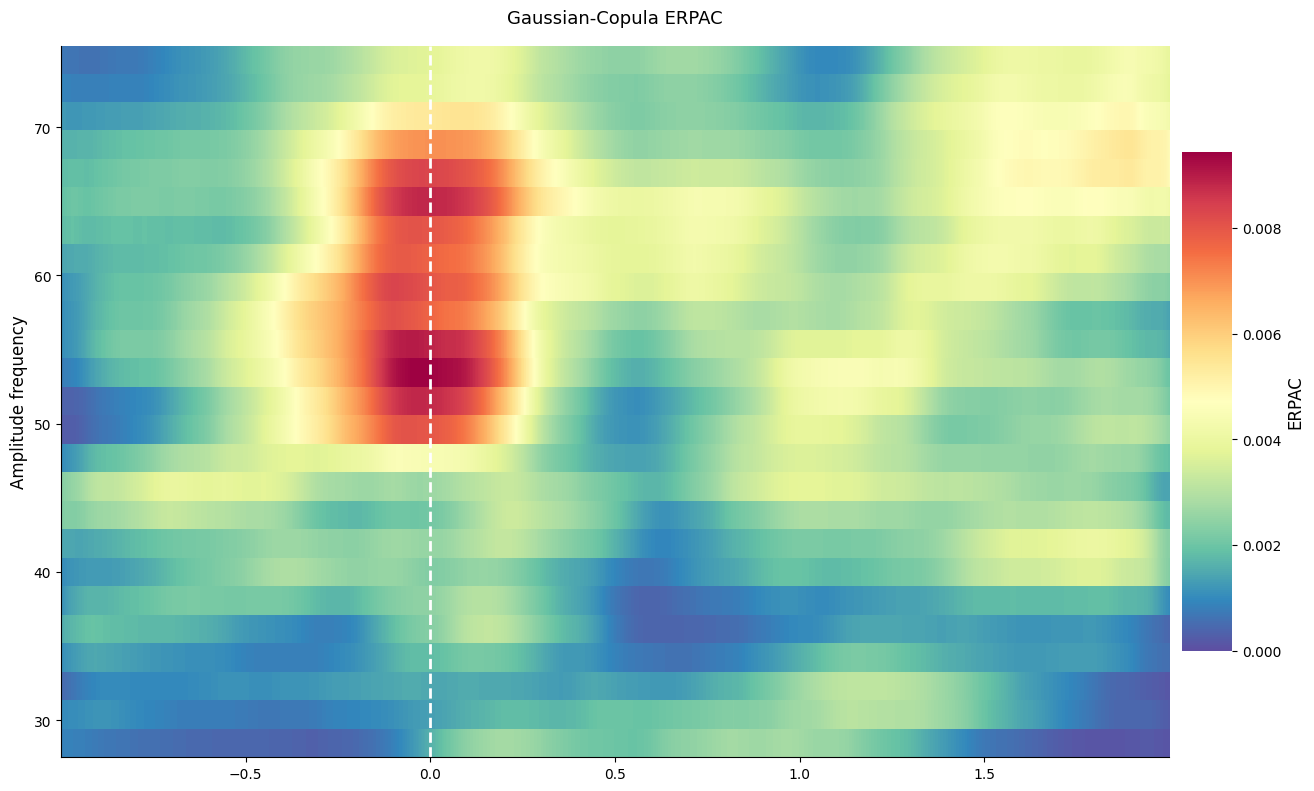

In [27]:
pid = '7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04'



epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
time = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    if i > 0 :
        break 
    epoch = epochs.copy().pick_channels([ch])

    meta = epochs.metadata.reset_index()
    indices = np.where(((meta['contrastLeft'] < 0.1) | (meta['contrastRight'] < 0.1)))[0]
    data = epoch.get_data().squeeze()
    data = data[indices, :]  # Selecting data between 0 to 1s

    # define an ERPAC object
    p = EventRelatedPac(f_pha=[2, 7], f_amp=(25, 80, 5, 2))

    # extract phases and amplitudes
    pha = p.filter(sf, data, ftype='phase', n_jobs=1)
    amp = p.filter(sf, data, ftype='amplitude', n_jobs=1)


    # implemented ERPAC methods
    methods = [ 'gc']

    plt.figure(figsize=(14, 8))
    for n_m, m in enumerate(methods):
        # compute the erpac
        erpac = p.fit(pha, amp, method=m, smooth=100, n_jobs=-1).squeeze()

        # plot
        plt.subplot(len(methods), 1, n_m + 1)
        p.pacplot(erpac, time, p.yvec, xlabel='Time (second)' * n_m,
                cmap='Spectral_r', ylabel='Amplitude frequency', title=p.method,
                cblabel='ERPAC', vmin=0., rmaxis=True)
        plt.axvline(0, linestyle='--', color='w', linewidth=2)

    plt.tight_layout()
    p.show()



Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04/lfp_7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04_epoched.fif ...
Isotrak not found
    Found the data of interest:
        t =    -999.99 ...    1999.99 ms
        0 CTF compensation matrices available


/tmp/ipykernel_170077/3193908937.py:10: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04/lfp_7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
1132 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_170077/3193908937.py:21: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epoch.get_data().squeeze()
Event Related PAC object defined
    Compute Gaussian-Copula ERPAC


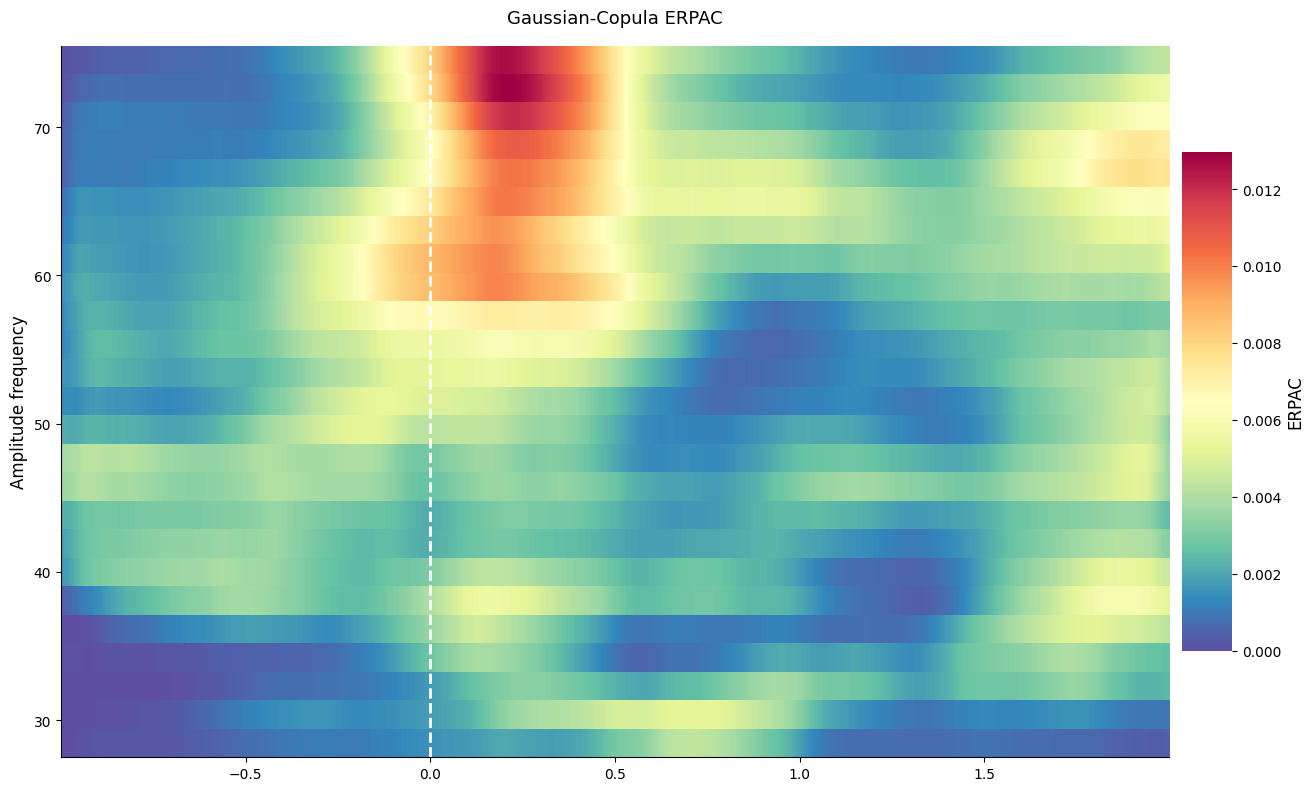

In [30]:
pid = '7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04'



epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
time = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    if i > 0 :
        break 
    epoch = epochs.copy().pick_channels([ch])

    meta = epochs.metadata.reset_index()
    indices = np.where(((meta['contrastLeft'] < 0.1) | (meta['contrastRight'] < 0.1)))[0]
    data = epoch.get_data().squeeze()
    data = data[0:250, :]  # Selecting data between 0 to 1s

    # define an ERPAC object
    p = EventRelatedPac(f_pha=[2, 7], f_amp=(25, 80, 5, 2))

    # extract phases and amplitudes
    pha = p.filter(sf, data, ftype='phase', n_jobs=1)
    amp = p.filter(sf, data, ftype='amplitude', n_jobs=1)


    # implemented ERPAC methods
    methods = [ 'gc']

    plt.figure(figsize=(14, 8))
    for n_m, m in enumerate(methods):
        # compute the erpac
        erpac = p.fit(pha, amp, method=m, smooth=100, n_jobs=-1).squeeze()

        # plot
        plt.subplot(len(methods), 1, n_m + 1)
        p.pacplot(erpac, time, p.yvec, xlabel='Time (second)' * n_m,
                cmap='Spectral_r', ylabel='Amplitude frequency', title=p.method,
                cblabel='ERPAC', vmin=0., rmaxis=True)
        plt.axvline(0, linestyle='--', color='w', linewidth=2)

    plt.tight_layout()
    p.show()



Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04/lfp_7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04_epoched.fif ...
Isotrak not found
    Found the data of interest:
        t =    -999.99 ...    1999.99 ms
        0 CTF compensation matrices available


/tmp/ipykernel_170077/1237889606.py:10: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04/lfp_7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
1132 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_170077/1237889606.py:21: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epoch.get_data().squeeze()
Event Related PAC object defined
    Compute Gaussian-Copula ERPAC


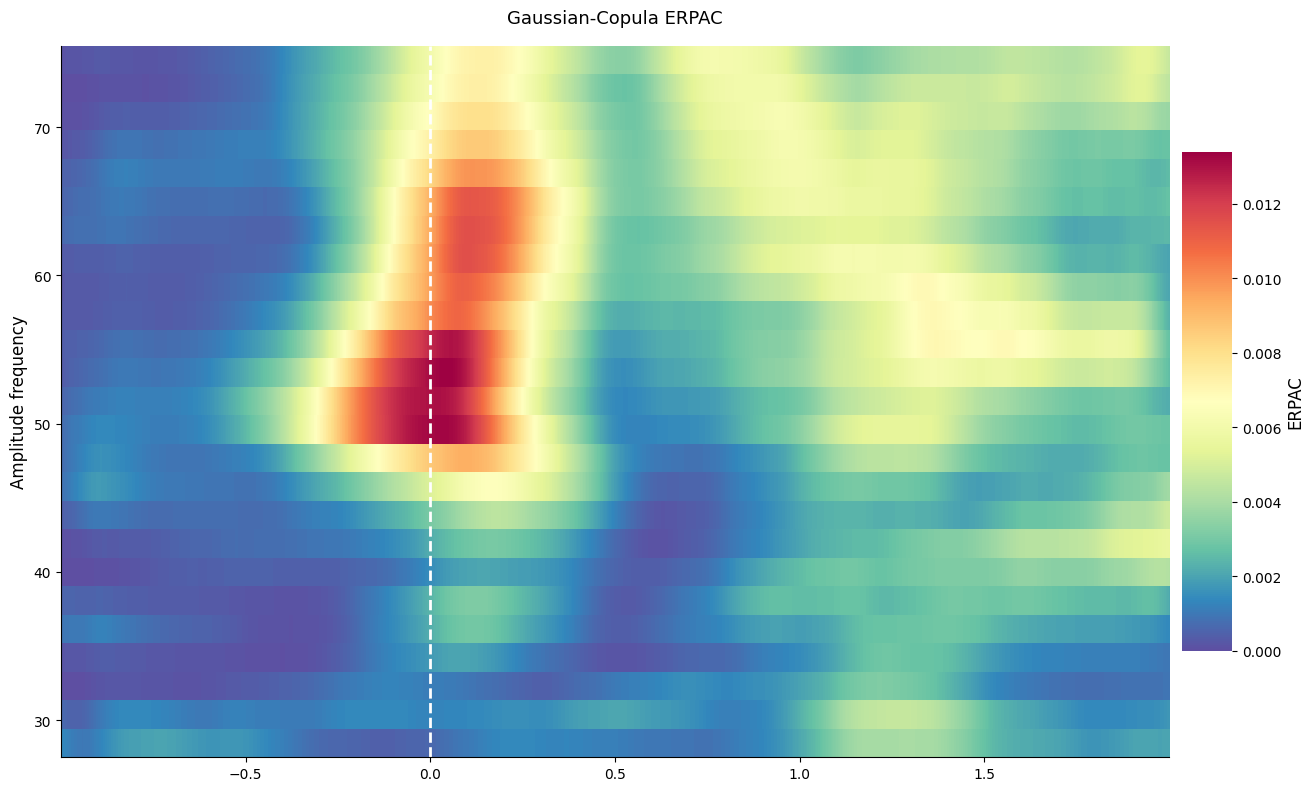

In [31]:
pid = '7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04'



epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
time = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    if i > 0 :
        break 
    epoch = epochs.copy().pick_channels([ch])

    meta = epochs.metadata.reset_index()
    indices = np.where(((meta['contrastLeft'] < 0.1) | (meta['contrastRight'] < 0.1)))[0]
    data = epoch.get_data().squeeze()
    data = data[-250:-1, :]  # Selecting data between 0 to 1s

    # define an ERPAC object
    p = EventRelatedPac(f_pha=[2, 7], f_amp=(25, 80, 5, 2))

    # extract phases and amplitudes
    pha = p.filter(sf, data, ftype='phase', n_jobs=1)
    amp = p.filter(sf, data, ftype='amplitude', n_jobs=1)


    # implemented ERPAC methods
    methods = [ 'gc']

    plt.figure(figsize=(14, 8))
    for n_m, m in enumerate(methods):
        # compute the erpac
        erpac = p.fit(pha, amp, method=m, smooth=100, n_jobs=-1).squeeze()

        # plot
        plt.subplot(len(methods), 1, n_m + 1)
        p.pacplot(erpac, time, p.yvec, xlabel='Time (second)' * n_m,
                cmap='Spectral_r', ylabel='Amplitude frequency', title=p.method,
                cblabel='ERPAC', vmin=0., rmaxis=True)
        plt.axvline(0, linestyle='--', color='w', linewidth=2)

    plt.tight_layout()
    p.show()



In [1]:
# define an ERPAC object
p = EventRelatedPac(f_pha=[2, 5], f_amp=(25, 100, 5, 1))

# method for correcting p-values for multiple comparisons
mcp = 'bonferroni'
# extract phases and amplitudes
erpac = p.filterfit(sf, data, method='circular', mcp=mcp).squeeze()
# get the p-values and squeeze unused dimensions
pvalues = p.pvalues.squeeze()
# set to nan everywhere it's not significant
erpac[pvalues > .05] = np.nan

vmin, vmax = np.nanmin(erpac), np.nanmax(erpac)

p.pacplot(erpac, time, p.yvec, xlabel='Time (second)',
          cmap='Spectral_r', ylabel='Amplitude frequency', title=p.method,
          cblabel='ERPAC', rmaxis=True, vmin=vmin, vmax=vmax)
plt.axvline(1., linestyle='--', color='k', linewidth=2)

p.show()

NameError: name 'EventRelatedPac' is not defined

In [24]:
pval = p.infer_pvalues(p=0.05, mcp=mcp)

AssertionError: No surrogates computed

In [23]:
pid = '7cbecb3f-6a8a-48e5-a3be-8f7a762b5a04'


def ploterpac(pid, n_jobs = 20):
    epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

    # Load metadata

    # Load the epochs
    epochs = mne.read_epochs(epoch_path, preload=True)
    sf = epochs.info['sfreq']
    meta = epochs.metadata.reset_index()
    epochs = epochs.crop(tmin=-0.5, tmax=1.5)
    for i, ch in enumerate(epochs.ch_names):
        
        plt.figure()
        
        epoch = epochs.copy().pick_channels([ch])

        
        data = epoch.get_data().squeeze()
        
        p = EventRelatedPac(f_pha=[2, 5], f_amp=(25, 90, 5, 1))
        erpac = p.filterfit(sf, data, method='gc', smooth = 100, n_perm = 500,  n_jobs = n_jobs).squeeze()
        pval = p.infer_pvalues(p=0.05).squeeze()

        # Plot the entire ERPAC data
        vmin, vmax = np.nanmin(erpac), np.nanmax(erpac)
        p.pacplot(erpac, epochs.times, p.yvec, xlabel='Time (second)',
                    cmap='Spectral_r', ylabel='Amplitude frequency', title=f'{ch} - phase freq = [2, 5] Hz',
                    cblabel='ERPAC', rmaxis=True, vmin=vmin, vmax=vmax)

        # Create a mask for non-significant data and overlay with grey
        non_signif_mask = np.tile(pvalues > .05, (erpac.shape[1], 1)).T  # Create a 2D mask
        plt.imshow(non_signif_mask, aspect='auto', e xtent=(epochs.times[0], epochs.times[-1], p.yvec[0], p.yvec[-1]),
                    cmap=mcolors.ListedColormap(['none', 'gray']), alpha=0.3, vmin=0, vmax=1)

        plt.axvline(0., linestyle='--', color='k', linewidth=2)
        
        plt.savefig(f'/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/PAC/erpacstats_{pid}_{ch}.png')
            




path = '/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/preprocessing/clean_data.csv'
df = pd.read_csv(path)

pids = df['pid'].values
for i, pid in enumerate (pids):
    if i > 0:
        break
    executor = submitit.AutoExecutor(folder="logs")
    # pass parameter to the executor
    executor.update_parameters(mem_gb=20, timeout_min=600, slurm_partition="CPU", cpus_per_task=20)
    # execute the job (note the .map_array command that different from the .submit command used above)
    jobs = executor.submit(ploterpac, pid)

In [12]:
epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'
epochs = mne.read_epochs(epoch_path, preload=True)
sf = epochs.info['sfreq']

for i, ch in enumerate(epochs.ch_names):
    if i > 0:
        break
    plt.figure()
    epoch = epochs.copy().pick_channels([ch])
    data = epoch.get_data().squeeze()
    data = data[:, 500:1000]
    p = EventRelatedPac(f_pha=[2, 5], f_amp=(25, 90, 5, 1))
    erpac = p.filterfit(sf, data, method='gc', smooth = 100, n_perm = 500,  n_jobs = 5).squeeze()
    pval = p.infer_pvalues(p=0.05).squeeze()

    # Plot the entire ERPAC data
    vmin, vmax = np.nanmin(erpac), np.nanmax(erpac)
    p.pacplot(erpac, epochs.times, p.yvec, xlabel='Time (second)',
                cmap='Spectral_r', ylabel='Amplitude frequency', title=f'{ch} - phase freq = [2, 5] Hz',
                cblabel='ERPAC', rmaxis=True, vmin=vmin, vmax=vmax)

    # Create a mask for non-significant data and overlay with grey
    non_signif_mask = np.tile(pval > .05, (erpac.shape[1], 1)).T  # Create a 2D mask
    plt.imshow(non_signif_mask, aspect='auto', extent=(epochs.times[0], epochs.times[-1], p.yvec[0], p.yvec[-1]),
                cmap=mcolors.ListedColormap(['none', 'gray']), alpha=0.3, vmin=0, vmax=1)

    plt.axvline(0., linestyle='--', color='k', linewidth=2)
    plt.show()
    plt.savefig(f'/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/PAC/erpacstats_{pid}_{ch}.png')

Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/4b93a168-0f3b-4124-88fa-a57046ca70e1/lfp_4b93a168-0f3b-4124-88fa-a57046ca70e1_epoched.fif ...
Isotrak not found


/tmp/ipykernel_191392/2741383631.py:2: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/4b93a168-0f3b-4124-88fa-a57046ca70e1/lfp_4b93a168-0f3b-4124-88fa-a57046ca70e1_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 16 columns
658 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_191392/2741383631.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epoch.get_data().squeeze()
Event Related PAC object defined
    Extract phases (n_pha=1) and amplitudes (n_amps=5)
    Compute Gaussian-Copula ERPAC
    Compute 60 permutations
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)


<Figure size 640x480 with 0 Axes>

WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)


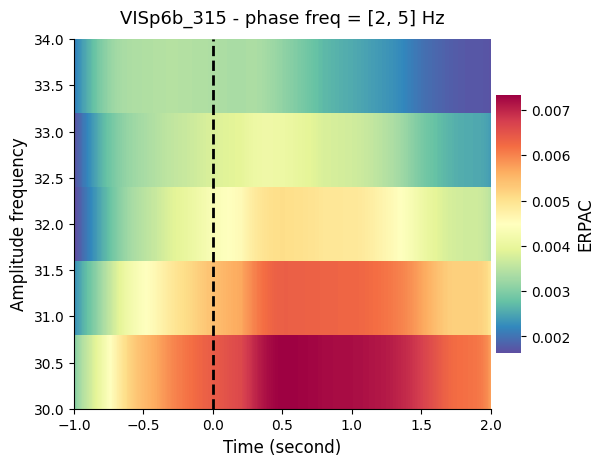

In [21]:
pvalues = p.infer_pvalues(p=0.05).squeeze()

# Plot the entire ERPAC data
vmin, vmax = np.nanmin(erpac), np.nanmax(erpac)
p.pacplot(erpac, epochs.times, p.yvec, xlabel='Time (second)',
            cmap='Spectral_r', ylabel='Amplitude frequency', title=f'{ch} - phase freq = [2, 5] Hz',
            cblabel='ERPAC', rmaxis=True, vmin=vmin, vmax=vmax)

# Create a mask for non-significant data and overlay with grey
non_signif_mask = np.tile(pvalues > .05, (erpac.shape[1], 1)).T  # Create a 2D mask
plt.imshow(non_signif_mask, aspect='auto', extent=(epochs.times[0], epochs.times[-1], p.yvec[0], p.yvec[-1]),
            cmap=mcolors.ListedColormap(['none', 'gray']), alpha=0.9, vmin=0, vmax=1)

plt.axvline(0., linestyle='--', color='k', linewidth=2)
plt.show()

In [22]:
import os 
path = '/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/PAC/erpac/'

files = [f for f in os.listdir(path) if 'stats' in f]
for f in files:
    os.remove(os.path.join(path, f))

In [8]:

def dummy():
    pid = 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e'



    epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

    # Load metadata

    # Load the epochs
    epochs = mne.read_epochs(epoch_path, preload=True)
    time = epochs.times
    sf = epochs.info['sfreq']
    meta = epochs.metadata.reset_index()
    for i, ch in enumerate(epochs.ch_names):
        if i >0 :
            break 
        epoch = epochs.copy().pick_channels([ch])

        
        data = epoch.get_data().squeeze()
        

    # define an ERPAC object
    p = EventRelatedPac(f_pha='hres', f_amp='hres')

    # extract phases and amplitudes
    pha = p.filter(sf, data, ftype='phase', n_jobs=25)
    amp = p.filter(sf, data, ftype='amplitude', n_jobs=25)


    # implemented ERPAC methods
    methods = [ 'circular', 'gc']

    plt.figure(figsize=(14, 8))
    for n_m, m in enumerate(methods):
        # compute the erpac
        erpac = p.fit(pha, amp, method=m, smooth=100, n_jobs=25).squeeze()

        # plot
        plt.subplot(len(methods), 1, n_m + 1)
        p.pacplot(erpac, time, p.yvec, xlabel='Time (second)' * n_m,
                cmap='Spectral_r', ylabel='Amplitude frequency', title=p.method,
                cblabel='ERPAC', vmin=0., rmaxis=True)
        plt.axvline(0, linestyle='--', color='w', linewidth=2)

    plt.tight_layout()
    p.savefig('erpac.png')
    
executor = submitit.AutoExecutor(folder="logs")
# pass parameter to the executor
executor.update_parameters(mem_gb=20, timeout_min=600, slurm_partition="CPU", cpus_per_task=25)
# execute the job (note the .map_array command that different from the .submit command used above)
jobs = executor.submit(dummy)



In [9]:
# define an ERPAC object


def dummy():
    pid = 'e4ce2e94-6fb9-4afe-acbf-6f5a3498602e'



    epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

    # Load metadata

    # Load the epochs
    epochs = mne.read_epochs(epoch_path, preload=True)
    time = epochs.times
    sf = epochs.info['sfreq']
    meta = epochs.metadata.reset_index()
    for i, ch in enumerate(epochs.ch_names):
        if i >0 :
            break 
        epoch = epochs.copy().pick_channels([ch])

        
        data = epoch.get_data().squeeze()
        

    # define an ERPAC object
    p = EventRelatedPac(f_pha= (2,7,1,0.5), f_amp=(25, 100, 5, 1))

    # extract phases and amplitudes
    pha = p.filter(sf, data, ftype='phase', n_jobs=25)
    amp = p.filter(sf, data, ftype='amplitude', n_jobs=25)


    # implemented ERPAC methods
    methods = [ 'circular', 'gc']

    plt.figure(figsize=(14, 8))
    for n_m, m in enumerate(methods):
        # compute the erpac
        erpac = p.fit(pha, amp, method=m, smooth=100, n_jobs=25).squeeze()

        # plot
        plt.subplot(len(methods), 1, n_m + 1)
        p.pacplot(erpac, time, p.yvec, xlabel='Time (second)' * n_m,
                cmap='Spectral_r', ylabel='Amplitude frequency', title=p.method,
                cblabel='ERPAC', vmin=0., rmaxis=True)
        plt.axvline(0, linestyle='--', color='w', linewidth=2)

    plt.tight_layout()
    p.savefig('erpac2.png')
    
executor = submitit.AutoExecutor(folder="logs")
# pass parameter to the executor
executor.update_parameters(mem_gb=20, timeout_min=600, slurm_partition="CPU", cpus_per_task=25)
# execute the job (note the .map_array command that different from the .submit command used above)
jobs = executor.submit(dummy)



In [ ]:
pid = 'd213e786-4b1c-477d-a710-766d69fa1ac1'



epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
times = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    if i >0 :
        break 
    epoch = epochs.copy().pick_channels([ch])

    
    data = epoch.get_data().squeeze()
    
    data = data[:, 500:1000]  # Selecting data between 0 to 1s

    p_obj = Pac(idpac=(6, 0, 0), f_pha=(1.5, 5, 1, .2), f_amp=(15, 50, 4, 2))

    # Extract all of the phases and amplitudes
    pha_p = p_obj.filter(sf, data, ftype='phase')
    amp_p = p_obj.filter(sf, data, ftype='amplitude')
    
    
    
    
    # still using the Gaussian-Copula PAC but this time, we also select the method
    # for computing the permutations
    p_obj.idpac = (6, 2, 2)
    # compute pac and 200 surrogates
    pac_prep = p_obj.fit(pha_p[..., :], amp_p[..., :], n_perm=400,
                        random_state=0)
    # get the p-values
    mcp = 'maxstat'
    pvalues = p_obj.infer_pvalues(p=0.05, mcp=mcp)

    # sphinx_gallery_thumbnail_number = 7
    plt.figure(figsize=(8, 6))
    title = (r" [0, 1 s] "
            f"(p<0.05, {mcp}-corrected for multiple "
            "comparisons)")
    # plot the non-significant pac in gray
    pac_prep_ns = pac_prep.mean(-1).copy()
    pac_prep_ns[pvalues < .05] = np.nan
    p_obj.comodulogram(pac_prep_ns, cmap='gray', vmin=np.nanmin(pac_prep_ns),
                    vmax=np.nanmax(pac_prep_ns), colorbar=False)
    # plot the significant pac in color
    pac_prep_s = pac_prep.mean(-1).copy()
    pac_prep_s[pvalues >= .05] = np.nan
    p_obj.comodulogram(pac_prep_s, cmap='Spectral_r', vmin=np.nanmin(pac_prep_s),
                    vmax=np.nanmax(pac_prep_s), title=title)
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
pid = 'd213e786-4b1c-477d-a710-766d69fa1ac1'



epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'

# Load metadata

# Load the epochs
epochs = mne.read_epochs(epoch_path, preload=True)
times = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
for i, ch in enumerate(epochs.ch_names):
    if i >0 :
        break 
    epoch = epochs.copy().pick_channels([ch])

    
    data = epoch.get_data().squeeze()
    
    data = data[:, 500:1000]  # Selecting data between 0 to 1s

    p_obj = Pac(idpac=(6, 0, 0), f_pha=(1.5, 5, 1, .2), f_amp=(15, 50, 4, 2))

    # Extract all of the phases and amplitudes
    pha_p = p_obj.filter(sf, data, ftype='phase')
    amp_p = p_obj.filter(sf, data, ftype='amplitude')
    
    
    
    
    # still using the Gaussian-Copula PAC but this time, we also select the method
    # for computing the permutations
    p_obj.idpac = (2, 2, 0)
    # compute pac and 200 surrogates
    pac_prep = p_obj.fit(pha_p[..., :], amp_p[..., :], n_perm=400,
                        random_state=0)
    # get the p-values
    mcp = 'maxstat'
    pvalues = p_obj.infer_pvalues(p=0.05, mcp=mcp)

    # sphinx_gallery_thumbnail_number = 7
    plt.figure(figsize=(8, 6))
    title = (r" [0, 1 s] "
            f"(p<0.05, {mcp}-corrected for multiple "
            "comparisons)")
    # plot the non-significant pac in gray
    pac_prep_ns = pac_prep.mean(-1).copy()
    pac_prep_ns[pvalues < .05] = np.nan
    p_obj.comodulogram(pac_prep_ns, cmap='gray', vmin=np.nanmin(pac_prep_ns),
                    vmax=np.nanmax(pac_prep_ns), colorbar=False)
    # plot the significant pac in color
    pac_prep_s = pac_prep.mean(-1).copy()
    pac_prep_s[pvalues >= .05] = np.nan
    p_obj.comodulogram(pac_prep_s, cmap='Spectral_r', vmin=np.nanmin(pac_prep_s),
                    vmax=np.nanmax(pac_prep_s), title=title)
    plt.gca().invert_yaxis()
    plt.show()